<a href="https://colab.research.google.com/github/Prateek1337/Image_Super_resolution/blob/master/ImageResFilterExperiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
drive  sample_data


In [2]:
import os 
os.chdir("/content/drive/My Drive/Image_Resolution/")
os.getcwd()
!ls

 butterfly.png		 out22_rgb.png		 SRCNNCheck915.h5
 crop_train.h5		'Output of 915.png'	 SRCNN_check935.h5
 face.png		'Output of 935.png'	 SRCNNCheck935.h5
 input2_rgb.png		'Output of 955.png'	 SRCNN_check955.h5
 input3_rgb.png		'Output of the915.png'	 SRCNNCheck955.h5
 inputTes_rgb.png	'Output of the935.png'	 SRCNN_check_rgb_9-3-5.h5
'Input to 915.png'	'Output of the955.png'	 SRCNN_check_rgb_9-5-5.h5
'Input to 935.png'	 outTes_rgb.png		 SRCNN_check_rgb.h5
'Input to 955.png'	 prepare_data.py	 test.h5
'Input to the 915.png'	 pre_rgb.png		 test_rgb.h5
'Input to the 935.png'	 __pycache__		 train_rgb.h5
'Input to the 955.png'	 SRCNN_check915.h5


In [5]:
from keras import initializers
from keras.models import Sequential
from keras.layers import Conv2D, Input, BatchNormalization
# from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import ModelCheckpoint,Callback
from keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import prepare_data as pd
import numpy 
import math


Using TensorFlow backend.


In [0]:
#setting seed for uniform results
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [7]:
data_Y, label_Y = pd.read_training_data("./test.h5")
print(data_Y.shape,label_Y.shape)

(420, 32, 32, 1) (420, 20, 20, 1)


In [0]:
#9-1-5 Architecture 
def model915():
    # lrelu = LeakyReLU(alpha=0.1)
    SRCNN = Sequential()
    SRCNN.add(Conv2D(nb_filter=128, nb_row=9, nb_col=9, init='glorot_uniform',
                     activation='relu', border_mode='valid', bias=True, input_shape=(32, 32, 1)))
    SRCNN.add(Conv2D(nb_filter=64, nb_row=1, nb_col=1, init='glorot_uniform',
                     activation='relu', border_mode='same', bias=True))
    # SRCNN.add(BatchNormalization())
    SRCNN.add(Conv2D(nb_filter=1, nb_row=5, nb_col=5, init='glorot_uniform',
                     activation='linear', border_mode='valid', bias=True))
    adam = Adam(lr=0.0003)
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    return SRCNN
def predict_model915():
    # lrelu = LeakyReLU(alpha=0.1)
    SRCNN = Sequential()
    SRCNN.add(Conv2D(nb_filter=128, nb_row=9, nb_col=9, init='glorot_uniform',
                     activation='relu', border_mode='valid', bias=True, input_shape=(None, None, 1)))
    SRCNN.add(Conv2D(nb_filter=64, nb_row=1, nb_col=1, init='glorot_uniform',
                     activation='relu', border_mode='same', bias=True))
    # SRCNN.add(BatchNormalization())
    SRCNN.add(Conv2D(nb_filter=1, nb_row=5, nb_col=5, init='glorot_uniform',
                     activation='linear', border_mode='valid', bias=True))
    adam = Adam(lr=0.0003)
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    return SRCNN

 
 
#9-3-5 Architecture 
def model935():
    # lrelu = LeakyReLU(alpha=0.1)
    SRCNN = Sequential()
    SRCNN.add(Conv2D(nb_filter=128, nb_row=9, nb_col=9, init='glorot_uniform',
                     activation='relu', border_mode='valid', bias=True, input_shape=(32, 32, 1)))
    SRCNN.add(Conv2D(nb_filter=64, nb_row=3, nb_col=3, init='glorot_uniform',
                     activation='relu', border_mode='same', bias=True))
    # SRCNN.add(BatchNormalization())
    SRCNN.add(Conv2D(nb_filter=1, nb_row=5, nb_col=5, init='glorot_uniform',
                     activation='linear', border_mode='valid', bias=True))
    adam = Adam(lr=0.0003)
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    return SRCNN
def predict_model935():
    # lrelu = LeakyReLU(alpha=0.1)
    SRCNN = Sequential()
    SRCNN.add(Conv2D(nb_filter=128, nb_row=9, nb_col=9, init='glorot_uniform',
                     activation='relu', border_mode='valid', bias=True, input_shape=(None, None, 1)))
    SRCNN.add(Conv2D(nb_filter=64, nb_row=3, nb_col=3, init='glorot_uniform',
                     activation='relu', border_mode='same', bias=True))
    # SRCNN.add(BatchNormalization())
    SRCNN.add(Conv2D(nb_filter=1, nb_row=5, nb_col=5, init='glorot_uniform',
                     activation='linear', border_mode='valid', bias=True))
    adam = Adam(lr=0.0003)
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    return SRCNN


 
#9-5-5 Architecture 
def model955():
    # lrelu = LeakyReLU(alpha=0.1)
    SRCNN = Sequential()
    SRCNN.add(Conv2D(nb_filter=128, nb_row=9, nb_col=9, init='glorot_uniform',
                     activation='relu', border_mode='valid', bias=True, input_shape=(32, 32, 1)))
    SRCNN.add(Conv2D(nb_filter=64, nb_row=5, nb_col=5, init='glorot_uniform',
                     activation='relu', border_mode='same', bias=True))
    # SRCNN.add(BatchNormalization())
    SRCNN.add(Conv2D(nb_filter=1, nb_row=5, nb_col=5, init='glorot_uniform',
                     activation='linear', border_mode='valid', bias=True))
    adam = Adam(lr=0.0003)
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    return SRCNN
def predict_model955():
    # lrelu = LeakyReLU(alpha=0.1)
    SRCNN = Sequential()
    SRCNN.add(Conv2D(nb_filter=128, nb_row=9, nb_col=9, init='glorot_uniform',
                     activation='relu', border_mode='valid', bias=True, input_shape=(None, None, 1)))
    SRCNN.add(Conv2D(nb_filter=64, nb_row=5, nb_col=5, init='glorot_uniform',
                     activation='relu', border_mode='same', bias=True))
    # SRCNN.add(BatchNormalization())
    SRCNN.add(Conv2D(nb_filter=1, nb_row=5, nb_col=5, init='glorot_uniform',
                     activation='linear', border_mode='valid', bias=True))
    adam = Adam(lr=0.0003)
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    return SRCNN


 

In [0]:
def psnr(target, ref):
    mse = numpy.mean( (target - ref) ** 2 )
    PIXEL_MAX = 255.0
    if mse == 0:
        return 100
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))



class PsnrHistory(Callback):
    def on_train_begin(self, logs={}):
        self.psnrs = []
        
    def on_epoch_end(self, epoch, logs={}):
        global modelArc
        if modelArc=="955":
          srcnn_model=predict_model955()
          weights_file="SRCNN_check955.h5"
        elif modelArc=="935":
          srcnn_model=predict_model935()
          weights_file="SRCNN_check935.h5"
        elif modelArc=="915":
          srcnn_model=predict_model915()
          weights_file="SRCNN_check915.h5"
        srcnn_model.load_weights(weights_file)
        avg_psnr=0.0
        import cv2
        for i in range(0,data_Y.shape[0]):
            img=data_Y[i]
            Y = numpy.zeros((1, img.shape[0], img.shape[1], 1), dtype=float)
            Y[0, :, :, :] = img
            pre = srcnn_model.predict(Y, batch_size=1) * 255.
            pre[pre[:] > 255] = 255
            pre[pre[:] < 0] = 0
            img_pre=pre[0,:,:,:]
            avg_psnr=avg_psnr+psnr(label_Y[i]*255, img_pre)

        avg_psnr=(avg_psnr/data_Y.shape[0])
        
        self.psnrs.append((avg_psnr))
    

In [0]:
#TPU EXPERIMENTATION TRY LATER
try:
  device_name = os.environ['COLAB_TPU_ADDR']
  TPU_ADDRESS = 'grpc://' + device_name
  print('Found TPU at: {}'.format(TPU_ADDRESS))

except KeyError:
  print('TPU not found')

TPU not found


In [0]:
#TPU EXPERIMENTATION TRY LATER
import tensorflow as tf


tpu_model915 = tf.contrib.tpu.keras_to_tpu_model(
    model915,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(
            tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    )
)
tpu_model935 = tf.contrib.tpu.keras_to_tpu_model(
    model935,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(
            tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    )
)
tpu_model955 = tf.contrib.tpu.keras_to_tpu_model(
    model955,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(
            tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    )
)

In [0]:
def train(history,arch):
    
    if arch=="915":
      srcnn_model = model915()
    elif arch=="935":
      srcnn_model=model935()
      
    else:
      srcnn_model=model955()
      
    print(srcnn_model.summary())
    data, label = pd.read_training_data("./crop_train.h5")
    val_data, val_label = pd.read_training_data("./test.h5")
    global modelArc
    modelArc=arch
    h5File="SRCNN_check"+arch+".h5"
    checkpoint = ModelCheckpoint(h5File, monitor='val_loss', verbose=1, save_best_only=True,
                                 save_weights_only=False, mode='min')
    callbacks_list = [checkpoint,history]

    srcnn_model.fit(data, label, batch_size=128, validation_data=(val_data, val_label),
                    callbacks=callbacks_list, shuffle=True, nb_epoch=200, verbose=0)
    # srcnn_model.load_weights("m_model_adam.h5")


In [17]:
history915=PsnrHistory()


train(history915,"915")
print(history915.psnrs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", input_shape=(32, 32, 1..., kernel_size=(9, 9), filters=128, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", kernel_size=(1, 1), filters=64, padding="same", kernel_initializer="glorot_uniform", use_bias=True)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="linear", kernel_size=(5, 5), filters=1, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Model: "sequential_203"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_607 (Conv2D)          (None, 24, 24, 128)       10496     
_________________________________________________________________
conv2d_608 (Conv2D)          (None, 24, 24, 64)        8256      
_________________________________________________________________
conv2d_609 (Conv2D)          (None, 20, 20, 1)         1601      
Total params: 20,353
Trainable params: 20,353
Non-trainable params: 0
_________________________________________________________________
None

Epoch 00001: val_loss improved from inf to 0.00695, saving model to SRCNN_check915.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", input_shape=(None, Non..., kernel_size=(9, 9), filters=128, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", kernel_size=(1, 1), filters=64, padding="same", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="linear", kernel_size=(5, 5), filters=1, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`



Epoch 00002: val_loss improved from 0.00695 to 0.00494, saving model to SRCNN_check915.h5

Epoch 00003: val_loss improved from 0.00494 to 0.00362, saving model to SRCNN_check915.h5

Epoch 00004: val_loss improved from 0.00362 to 0.00287, saving model to SRCNN_check915.h5

Epoch 00005: val_loss improved from 0.00287 to 0.00249, saving model to SRCNN_check915.h5

Epoch 00006: val_loss improved from 0.00249 to 0.00216, saving model to SRCNN_check915.h5

Epoch 00007: val_loss improved from 0.00216 to 0.00196, saving model to SRCNN_check915.h5

Epoch 00008: val_loss improved from 0.00196 to 0.00185, saving model to SRCNN_check915.h5

Epoch 00009: val_loss improved from 0.00185 to 0.00177, saving model to SRCNN_check915.h5

Epoch 00010: val_loss improved from 0.00177 to 0.00170, saving model to SRCNN_check915.h5

Epoch 00011: val_loss improved from 0.00170 to 0.00164, saving model to SRCNN_check915.h5

Epoch 00012: val_loss improved from 0.00164 to 0.00159, saving model to SRCNN_check915.h5

In [18]:
history935=PsnrHistory()


train(history935,"935")
print(history935.psnrs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", input_shape=(32, 32, 1..., kernel_size=(9, 9), filters=128, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", kernel_size=(3, 3), filters=64, padding="same", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="linear", kernel_size=(5, 5), filters=1, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Model: "sequential_404"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1210 (Conv2D)         (None, 24, 24, 128)       10496     
_________________________________________________________________
conv2d_1211 (Conv2D)         (None, 24, 24, 64)        73792     
_________________________________________________________________
conv2d_1212 (Conv2D)         (None, 20, 20, 1)         1601      
Total params: 85,889
Trainable params: 85,889
Non-trainable params: 0
_________________________________________________________________
None

Epoch 00001: val_loss improved from inf to 0.00613, saving model to SRCNN_check935.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", input_shape=(None, Non..., kernel_size=(9, 9), filters=128, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", kernel_size=(3, 3), filters=64, padding="same", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="linear", kernel_size=(5, 5), filters=1, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`



Epoch 00002: val_loss improved from 0.00613 to 0.00412, saving model to SRCNN_check935.h5

Epoch 00003: val_loss improved from 0.00412 to 0.00289, saving model to SRCNN_check935.h5

Epoch 00004: val_loss improved from 0.00289 to 0.00220, saving model to SRCNN_check935.h5

Epoch 00005: val_loss improved from 0.00220 to 0.00196, saving model to SRCNN_check935.h5

Epoch 00006: val_loss improved from 0.00196 to 0.00182, saving model to SRCNN_check935.h5

Epoch 00007: val_loss improved from 0.00182 to 0.00166, saving model to SRCNN_check935.h5

Epoch 00008: val_loss improved from 0.00166 to 0.00157, saving model to SRCNN_check935.h5

Epoch 00009: val_loss improved from 0.00157 to 0.00152, saving model to SRCNN_check935.h5

Epoch 00010: val_loss improved from 0.00152 to 0.00148, saving model to SRCNN_check935.h5

Epoch 00011: val_loss improved from 0.00148 to 0.00148, saving model to SRCNN_check935.h5

Epoch 00012: val_loss improved from 0.00148 to 0.00144, saving model to SRCNN_check935.h5

In [14]:
history955=PsnrHistory()


train(history955,"955")
print(history955.psnrs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", input_shape=(32, 32, 1..., kernel_size=(9, 9), filters=128, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", kernel_size=(5, 5), filters=64, padding="same", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="linear", kernel_size=(5, 5), filters=1, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 128)       10496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        204864    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 1)         1601      
Total params: 216,961
Trainable params: 216,961
Non-trainable params: 0
_________________________________________________________________
None

Epoch 00001: val_loss improved from inf to 0.00522, saving model to SRCNN_check955.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:78: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", input_shape=(None, Non..., kernel_size=(9, 9), filters=128, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", kernel_size=(5, 5), filters=64, padding="same", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:83: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="linear", kernel_size=(5, 5), filters=1, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`



Epoch 00002: val_loss improved from 0.00522 to 0.00281, saving model to SRCNN_check955.h5

Epoch 00003: val_loss improved from 0.00281 to 0.00210, saving model to SRCNN_check955.h5

Epoch 00004: val_loss improved from 0.00210 to 0.00179, saving model to SRCNN_check955.h5

Epoch 00005: val_loss improved from 0.00179 to 0.00174, saving model to SRCNN_check955.h5

Epoch 00006: val_loss improved from 0.00174 to 0.00156, saving model to SRCNN_check955.h5

Epoch 00007: val_loss improved from 0.00156 to 0.00149, saving model to SRCNN_check955.h5

Epoch 00008: val_loss improved from 0.00149 to 0.00146, saving model to SRCNN_check955.h5

Epoch 00009: val_loss improved from 0.00146 to 0.00143, saving model to SRCNN_check955.h5

Epoch 00010: val_loss did not improve from 0.00143

Epoch 00011: val_loss improved from 0.00143 to 0.00141, saving model to SRCNN_check955.h5

Epoch 00012: val_loss improved from 0.00141 to 0.00140, saving model to SRCNN_check955.h5

Epoch 00013: val_loss improved from 0

In [0]:
def predict(architecture,file_name):
    if architecture=="915":
      srcnn_model = predict_model915()
    elif architecture=="935":
      srcnn_model=predict_model935()
    else:
      srcnn_model=predict_model955()
    weight_file="SRCNN_check"+architecture+".h5" 
    srcnn_model.load_weights(weight_file)
    IMG_NAME = file_name
    INPUT_NAME = "Input to the "+architecture+".png"
    OUTPUT_NAME = "Output of the"+architecture+".png"

    import cv2
    img = cv2.imread(IMG_NAME, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    shape = img.shape
    Y_img = cv2.resize(img[:, :, 0], (int(shape[1] / 2), int(shape[0] / 2)), cv2.INTER_CUBIC)
    Y_img = cv2.resize(Y_img, (shape[1], shape[0]), cv2.INTER_CUBIC)
    print(img.shape,Y_img.shape)
    img[:, :, 0] = Y_img
    Y_img=img[:,:,0]
    img = cv2.cvtColor(img, cv2.COLOR_YCrCb2BGR)
    cv2.imwrite(INPUT_NAME, img)

    Y = numpy.zeros((1, img.shape[0], img.shape[1], 1), dtype=float)
    Y[0, :, :, 0] = Y_img.astype(float) / 255.
    pre = srcnn_model.predict(Y, batch_size=1) * 255.
    print(pre.shape)
    pre[pre[:] > 255] = 255
    pre[pre[:] < 0] = 0
    pre = pre.astype(numpy.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    img[6: -6, 6: -6, 0] = pre[0, :, :, 0]
    img = cv2.cvtColor(img, cv2.COLOR_YCrCb2BGR)
    print(img.shape)
    cv2.imwrite(OUTPUT_NAME, img)

    # psnr calculation:
    im1_rgb = cv2.imread(IMG_NAME, cv2.IMREAD_COLOR)[6: -6, 6: -6, :]
    im1_Y = cv2.cvtColor(im1_rgb, cv2.COLOR_BGR2YCrCb)
    im2_rgb = cv2.imread(INPUT_NAME, cv2.IMREAD_COLOR)[6: -6, 6: -6, :]
    im2_Y = cv2.cvtColor(im2_rgb, cv2.COLOR_BGR2YCrCb)
    im3_rgb = cv2.imread(OUTPUT_NAME, cv2.IMREAD_COLOR)[6: -6, 6: -6, :]
    im3_Y = cv2.cvtColor(im3_rgb, cv2.COLOR_BGR2YCrCb)
    print(im3_Y.shape,im1_Y.shape)
    print("bicubic:")
    print("YCrCCb= {} , RGB={}".format(psnr(im1_Y[:,:,0],im2_Y[:,:,0]),psnr(im1_rgb,im2_rgb)))
    print("SRCNN:")
    print("YCrCCb= {} , RGB={}".format(psnr(im1_Y[:,:,0],im3_Y[:,:,0]),psnr(im1_rgb,im3_rgb)))



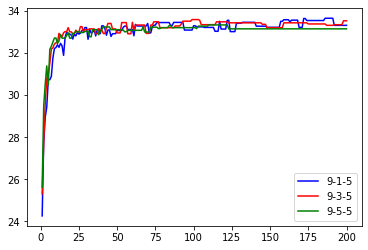

In [20]:

import numpy
x1=numpy.linspace(1,len(history915.psnrs),len(history915.psnrs))
y1 = numpy.asarray(history915.psnrs, dtype=numpy.float32)
x2=numpy.linspace(1,len(history935.psnrs),len(history935.psnrs))
y2 = numpy.asarray(history935.psnrs, dtype=numpy.float32)
x3=numpy.linspace(1,len(history955.psnrs),len(history955.psnrs))
y3 = numpy.asarray(history955.psnrs, dtype=numpy.float32)
fig, ax = plt.subplots()
ax.plot(x1,y1, '-b', label='9-1-5')
ax.plot(x2,y2, '-r', label='9-3-5')
ax.plot(x3,y3,'-g',label='9-5-5')

leg = ax.legend();

plt.show(fig)

In [25]:
predict("915","butterfly.png")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", input_shape=(None, Non..., kernel_size=(9, 9), filters=128, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", kernel_size=(1, 1), filters=64, padding="same", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="linear", kernel_size=(5, 5), filters=1, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`


(256, 256, 3) (256, 256)
(1, 244, 244, 1)
(256, 256, 3)
(244, 244, 3) (244, 244, 3)
bicubic:
YCrCCb= 32.053059313091204 , RGB=32.021477707251755
SRCNN:
YCrCCb= 33.26462712748934 , RGB=33.23101516696309


In [24]:
predict("935","butterfly.png")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", input_shape=(None, Non..., kernel_size=(9, 9), filters=128, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", kernel_size=(3, 3), filters=64, padding="same", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="linear", kernel_size=(5, 5), filters=1, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`


(256, 256, 3) (256, 256)
(1, 244, 244, 1)
(256, 256, 3)
(244, 244, 3) (244, 244, 3)
bicubic:
YCrCCb= 32.053059313091204 , RGB=32.021477707251755
SRCNN:
YCrCCb= 33.41284379396767 , RGB=33.384681629630954


In [26]:
predict("955","butterfly.png")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:78: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", input_shape=(None, Non..., kernel_size=(9, 9), filters=128, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", kernel_size=(5, 5), filters=64, padding="same", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:83: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="linear", kernel_size=(5, 5), filters=1, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`


(256, 256, 3) (256, 256)
(1, 244, 244, 1)
(256, 256, 3)
(244, 244, 3) (244, 244, 3)
bicubic:
YCrCCb= 32.053059313091204 , RGB=32.021477707251755
SRCNN:
YCrCCb= 33.321346307427504 , RGB=33.290039628015194
